 **Loading the Boston housing dataset**

In [25]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = ( boston_housing.load_data())

In [26]:
train_data.shape

(404, 13)

In [27]:
test_data.shape

(102, 13)

**Normalizing the data**

In [28]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std
test_data -= mean
test_data /= std


In [29]:
from tensorflow import keras
from tensorflow.keras import layers

**Building your model**

In [30]:
def build_model():
       model = keras.Sequential([
           layers.Dense(64,activation = "relu"),
           layers.Dense(64, activation = "relu"),
           layers.Dense(1)
        ])
       model.compile(optimizer = "rmsprop",loss = "mse",metrics = ["mae"])
       return model


In [31]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


**K-fold validation**

In [32]:
k =4 
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f"{i}")
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1)* num_val_samples:]],
        axis =0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i+1)* num_val_samples:]],
        axis =0)
        
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs = num_epochs , batch_size =16, verbose =0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)
                                                  

0
1
2
3


**Saving the validation logs at each fold**

In [33]:
num_epochs = 500 
all_mae_histories = [] 
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(   
                  [train_data[:i * num_val_samples],
                   train_data[(i + 1) * num_val_samples:]],
                   axis=0)
    partial_train_targets = np.concatenate(
                  [train_targets[:i * num_val_samples],
                   train_targets[(i + 1) * num_val_samples:]],
                   axis=0)
    model = build_model()      
    history = model.fit(partial_train_data, partial_train_targets,   
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [34]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

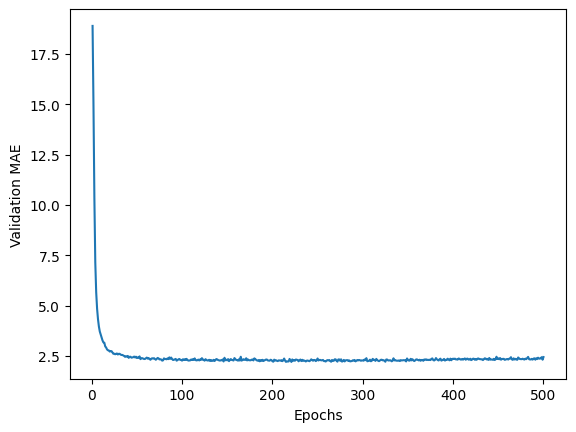

In [38]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()


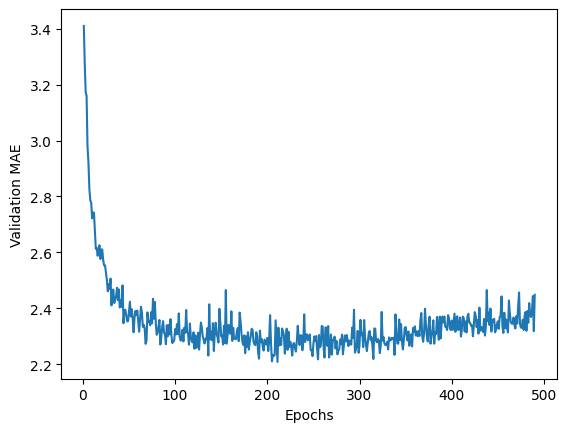

In [39]:
 truncated_mae_history = average_mae_history[10:]
 plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
 plt.xlabel("Epochs")
 plt.ylabel("Validation MAE")
 plt.show()

In [41]:
model = build_model()
model.fit(train_data, train_targets,
epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 12.6721 - mae: 2.3980


In [42]:
test_mae_score

2.6212565898895264

In [43]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([8.568104], dtype=float32)